In [1]:
%pylab inline
from parcels import FieldSet, Field, ParticleSet, JITParticle, AdvectionRK4, ErrorCode, Variable
import cartopy
from glob import glob
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
import xarray as xr
from netCDF4 import Dataset
import math as math
from ParticlePlotFunctions import *
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


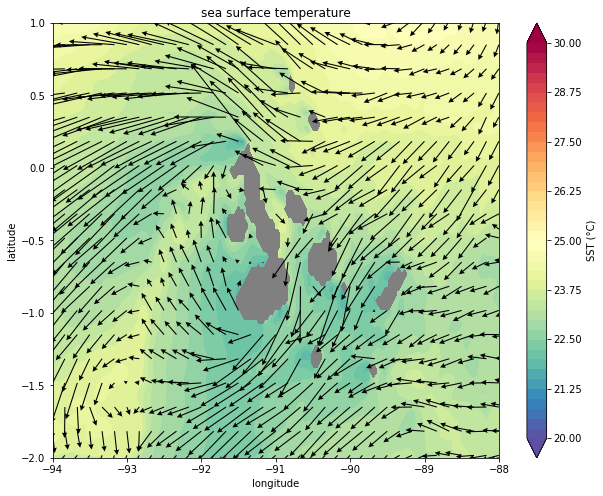

In [23]:
# plot SST + quiver of specific date

Ufiles = '/home/sypmauu/GalapagosProject/data/MIT4km/RGEMS3_2008_Surf.nc'
Xfiles = '/home/sypmauu/GalapagosProject/data/MIT4km/RGEMS3_Surf_grid.nc'

date = 200

dfile = Dataset(Ufiles)
Uvel = dfile.variables['UVEL'][date,:,:]
Vvel = dfile.variables['VVEL'][date,:,:]
Tvel = dfile.variables['THETA'][date,:,:]
dfile = Dataset(Xfiles)
lon = dfile.variables['XG'][:]
lat = dfile.variables['YG'][:]

Tvel[Tvel==0]=nan
Uvel[Uvel==0]=nan
Vvel[Vvel==0]=nan
map_extent = [-94,-88,-2,1]
figsize=(10, 8)
Tmin=20
Tmax=30                               
dq=5
headwidth=5
headlength=5
scale=1.5
PlotSSTquiver(lon,lat,Tvel,Uvel,Vvel,figsize=figsize,
              map_extent=map_extent,
              dq=dq,
              headwidth=headwidth,
              headlength=headlength,
              scale=scale)

In [ ]:
# compute year mean

Ufiles = '/home/sypmauu/GalapagosNEMO/data/RGEMS3_2008_Surf.nc'
Xfiles = '/home/sypmauu/GalapagosNEMO/data/RGEMS3_Surf_grid.nc'
dfile = Dataset(Xfiles)
lon = dfile.variables['XG'][:]
lat = dfile.variables['YG'][:]

ddates = range(0,365)

Umean = np.zeros([len(lat),len(lon)], dtype=float)
Vmean = np.zeros([len(lat),len(lon)], dtype=float)
Tmean = np.zeros([len(lat),len(lon)], dtype=float)

teller = 0
dfile = Dataset(Ufiles)
for t in ddates:
    teller += 1
    print(teller)
    Umean += dfile.variables['UVEL'][t,:,:]
    Vmean += dfile.variables['VVEL'][t,:,:]
    Tmean += dfile.variables['THETA'][t,:,:]

Umean = Umean/teller
Vmean = Vmean/teller
Tmean = Tmean/teller

In [ ]:
# plot SST quiver for mean fields

Umean[Umean==0]=nan
Vmean[Vmean==0]=nan
Tmean[Tmean==0]=nan

map_extent = [-105,-75,-10,10]
PlotSSTquiver(lon,lat,Tmean,Umean,Vmean,figsize=(9,6),map_extent=map_extent,dq=20)
plt.savefig('../../results/figures/MITgcmfields_mean2008.pdf')